# Gradient Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X = df.drop('class', axis = 1)
X = pd.get_dummies(X, drop_first = True)
y = df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
n_estimators = [50, 100]
learning_rate = [0.1, 0.05, 0.2]
max_depth = [3, 4, 5]

param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth': max_depth}

In [13]:
model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(model, param_grid)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
pred = grid.predict(X_test)

In [21]:
grid.best_estimator_

GradientBoostingClassifier()

In [22]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

[[655   0]
 [  0 564]]


In [27]:
feat_imp = grid.best_estimator_.feature_importances_

In [31]:
imp_feat = pd.DataFrame(index = X.columns,
                        data = feat_imp,
                        columns = ['Importances']).sort_values('Importances')

In [38]:
imp_feat = imp_feat[imp_feat['Importances'] > 0.0005]

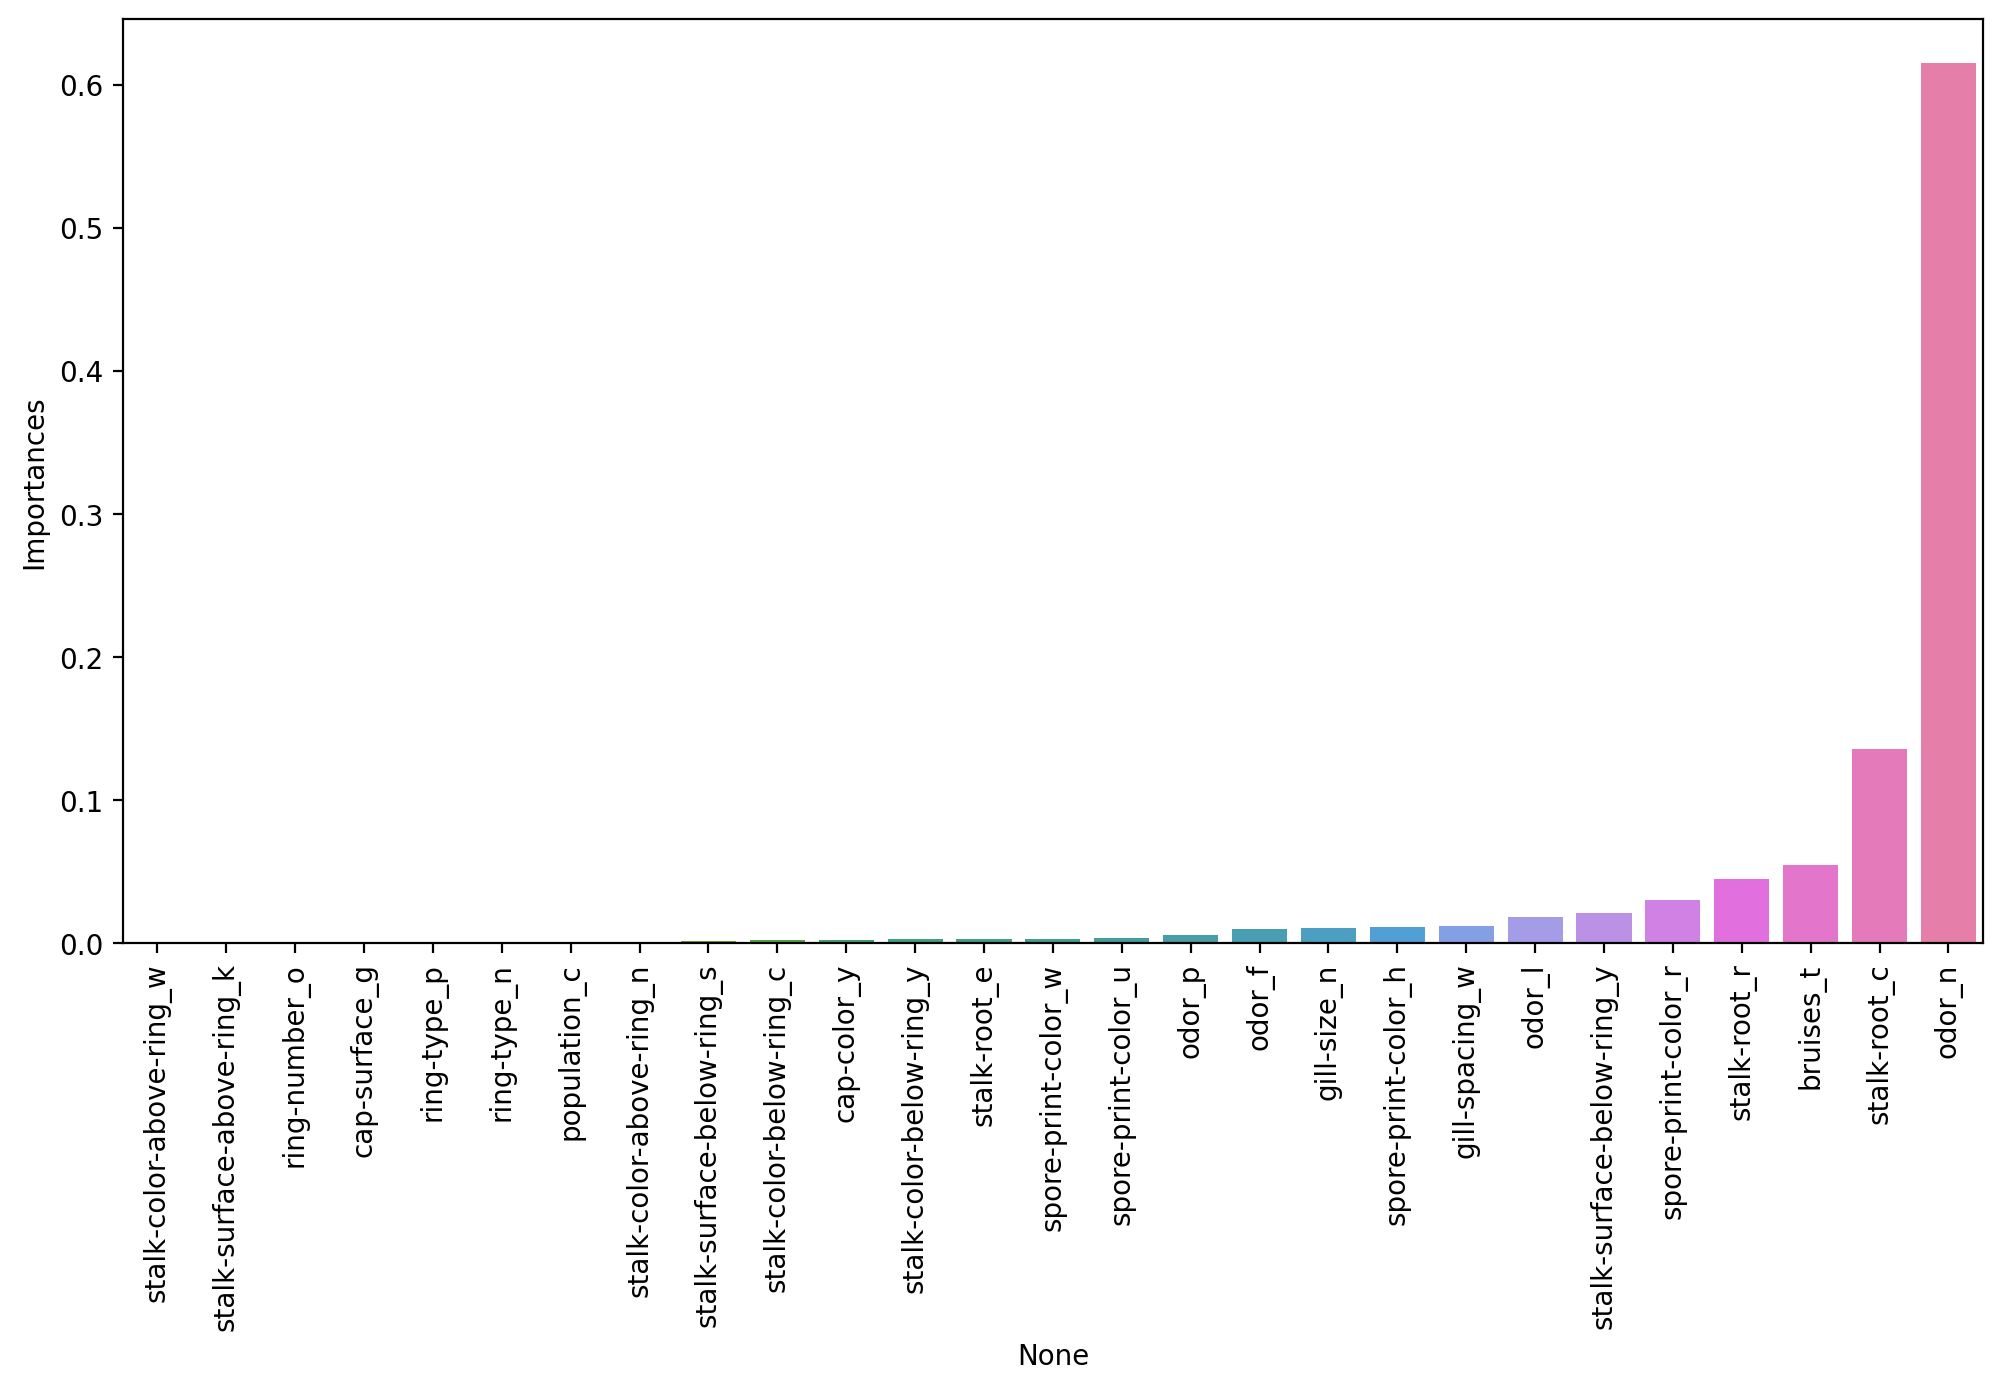

In [40]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(data = imp_feat, x = imp_feat.index, y='Importances', hue=imp_feat.index)
plt.xticks(rotation=90)
plt.show()